In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow.keras.datasets.mnist as mnist

In [2]:
(xtrain_raw,ytrain_raw),(xtest_raw,ytest_raw) = mnist.load_data()

training_index_3 = ytrain_raw ==3
training_index_4 = ytrain_raw ==4
training_index = training_index_3 | training_index_4

test_index_3 = ytest_raw ==3
test_index_4 = ytest_raw ==4
test_index = test_index_3 | test_index_4

xtrain = xtrain_raw[training_index]
ytrain = ytrain_raw[training_index]
xtest = xtest_raw[test_index]
ytest = ytest_raw[test_index]
xtrain = np.reshape(xtrain,(len(xtrain),784))
xtest  = np.reshape(xtest ,(len(xtest ),784))

pca = PCA(n_components=2)

xtrain = pca.fit_transform(xtrain).T
xtest  = pca.transform(xtest).T

ytrain = ytrain == 3
ytest  = ytest  == 3

In [3]:
print(np.max(xtrain,axis = 1))

[1600.02000255 1442.92924829]


In [4]:
## scale training set to [0,1]
vmax = np.zeros((2,1))
vmin = np.zeros((2,1))
vmax[0,0] = max(np.max(xtrain,axis = 1)[0],np.max(xtest,axis = 1)[0])
vmax[1,0] = max(np.max(xtrain,axis = 1)[1],np.max(xtest,axis = 1)[1])

vmin[0,0] = min(np.min(xtrain,axis = 1)[0],np.min(xtest,axis = 1)[0])
vmin[1,0] = min(np.min(xtrain,axis = 1)[1],np.min(xtest,axis = 1)[1])
xtrain = (xtrain-vmin)/(vmax-vmin)
xtest = (xtest-vmin)/(vmax-vmin)

In [5]:
def sigmoid(xx,w_1, w_0):
    return 1/(1+np.exp(-np.dot(w_1.T,xx) - w_0)).flatten()

def dsigmoid(xx,w_1, w_0):
    return(sigmoid(xx,w_1, w_0)*(1-sigmoid(xx,w_1, w_0)))

In [6]:
n_train = len(ytrain)
n_test  = len(ytest )

# Initialize




In [7]:
max_iter = 100
count = 0
threshold = 0.0005
step = 0.8

w_1 = np.random.rand(2, 1);
w_0 = 0.001
pred_train = np.zeros(n_train)
pred_test  = np.zeros(n_test )
err_train  = np.zeros(max_iter)
loss_train = np.zeros(max_iter)
err_test   = np.zeros(max_iter)
loss_test  = np.zeros(max_iter)
while count < max_iter:
    # Feed forward to get training prediction, error and loss
    
    prob_train = sigmoid(xtrain,w_1 ,w_0)
    pred_train = prob_train >= 0.5

    err_train[count] = np.sum(pred_train != ytrain)/n_train
    loss_train[count] = -np.sum(np.log(prob_train[ytrain]))-np.sum(np.log((1 - prob_train)[1-ytrain]))
    
    
    # Calculate gradient
    dw_1 = np.sum((prob_train-ytrain)*xtrain,axis = 1)/n_train
    dw_0 = np.sum(prob_train-ytrain)/n_train
    
    # Feed forward to get test prediction, error and loss
    prob_test = sigmoid(xtest,w_1 ,w_0)
    pred_test = prob_test >= 0.5
    
    err_test[count] = np.sum(pred_test != ytest)/n_test
    loss_test[count] = -np.sum(np.log(prob_test[ytest]))-np.sum(np.log((1-prob_test[1-ytest])))
    
    #Update parameters
    if count>0:
        if abs(loss_train[count]-loss_train[count-1])/loss_train[count] < threshold:
            count+=1
            break
        
    
    w_1 -= step*dw_1.reshape(-1,1)
    w_0 -= step*dw_0
    count+=1
    

In [8]:
print('Sigmoid activation and logistic loss')
print('iterations:      '+str(count) )
print('training error:  %.5f' % err_train[count-1])
print('test     error:  %.5f' % err_test[count-1])
print('training  loss:  %.1f' % loss_train[count-1])
print('test      loss:  %.1f' % loss_test[count-1])

Sigmoid activation and logistic loss
iterations:      51
training error:  0.02706
test     error:  0.02711
training  loss:  12186.5
test      loss:  1335.6


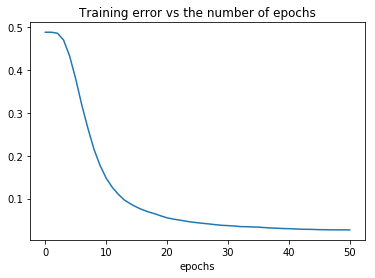

In [9]:
plt.plot(err_train[0:count])
plt.title('Training error vs the number of epochs')
plt.xlabel('epochs')
plt.show()


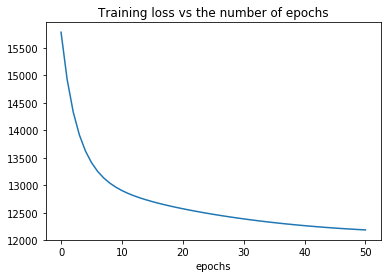

In [10]:
plt.plot(loss_train[0:count])
plt.title('Training loss vs the number of epochs')
plt.xlabel('epochs')
plt.show()


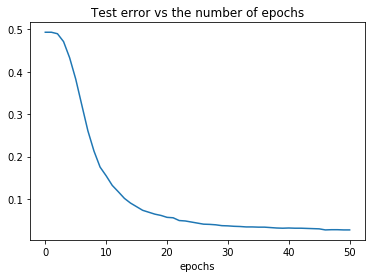

In [11]:
plt.plot(err_test[0:count])
plt.title('Test error vs the number of epochs')
plt.xlabel('epochs')
plt.show()


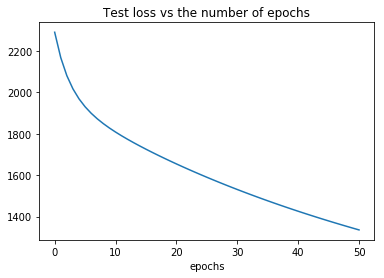

In [12]:
plt.plot(loss_test[0:count])
plt.title('Test loss vs the number of epochs')
plt.xlabel('epochs')
plt.show()


In [13]:
np.shape(prob_train)

(11973,)

In [14]:
max_iter = 100
count = 0
threshold = 0.0005
step = 0.5

w_1 = np.random.rand(2, 1);
w_0 = 0.001
pred_train = np.zeros(n_train)
pred_test  = np.zeros(n_test )
err_train  = np.zeros(max_iter)
loss_train = np.zeros(max_iter)
err_test   = np.zeros(max_iter)
loss_test  = np.zeros(max_iter)
while count < max_iter:
    # Feed forward to get training prediction, error and loss
    
    prob_train_1 = np.dot(w_1.T,xtrain) + w_0
    prob_train_0 = np.max(prob_train_1)-prob_train_1
    prob_train =  prob_train_1 >=prob_train_0
    pred_train = prob_train >= 0.5

    err_train[count] = np.sum(pred_train != ytrain)/n_train
    loss_train[count] = -np.sum(np.log(prob_train_1[:,ytrain]))-np.sum(np.log((prob_train_0)[:,1-ytrain]))
    
    
    # Calculate gradient
    dw_1 = (-np.sum((1/prob_train_1[:,ytrain]*xtrain[:,ytrain]),axis = 1)-np.sum((1/prob_train_0[:,1-ytrain]*xtrain[:,1-ytrain]),axis = 1)) /n_train
    dw_0 = -(np.sum((1/prob_train_1[:,ytrain]))+np.sum((1/prob_train_0[:,1-ytrain])))/n_train
    
    # Feed forward to get test prediction, error and loss
    prob_test_1 = np.dot(w_1.T,xtest) + w_0
    prob_test_0 = np.max(prob_test_1)-prob_test_1
    prob_test =  prob_test_1 >=prob_test_0
    pred_test = prob_test >= 0.5
    
    err_test[count] = np.sum(pred_test != ytest)/n_test
    loss_test[count] = -np.sum(np.log(prob_test_1[:,ytest]))-np.sum(np.log((prob_test_0)[:,1-ytest]))
    
    #Update parameters
    #if count>0:
    #    if abs(loss_train[count]-loss_train[count-1])/loss_train[count] < threshold:
    #        break
        
    
    w_1 -= step*dw_1.reshape(-1,1)
    w_0 -= step*dw_0
    count+=1
    

In [15]:
print('linear activation and logistic loss')
print('iterations:      '+str(count) )
print('training error:  %.5f' % err_train[count-1])
print('test     error:  %.5f' % err_test[count-1])
print('training  loss:  %.1f' % loss_train[count-1])
print('test      loss:  %.1f' % loss_test[count-1])

linear activation and logistic loss
iterations:      100
training error:  0.48793
test     error:  0.49297
training  loss:  -44848.6
test      loss:  -8585.1


In [16]:
max_iter = 100
count = 0
threshold = 0.0005
step = 2

w_1 = np.random.rand(2, 1);
w_0 = 1
pred_train = np.zeros(n_train)
pred_test  = np.zeros(n_test )
err_train  = np.zeros(max_iter)
loss_train = np.zeros(max_iter)
err_test   = np.zeros(max_iter)
loss_test  = np.zeros(max_iter)
while count < max_iter:
    # Feed forward to get training prediction, error and loss
    
    prob_train = sigmoid(xtrain,w_1 ,w_0)
    pred_train = prob_train >= 0.5

    err_train[count] = np.sum(pred_train != ytrain)/n_train
    loss_train[count] = -np.sum(np.log(prob_train[ytrain]))-np.sum(np.log((1 - prob_train)[1-ytrain]))
    
    
    # Calculate gradient
    dw_1 = np.sum((prob_train-ytrain)*xtrain,axis = 1)/n_train
    dw_0 = np.sum(prob_train-ytrain)/n_train
    
    # Feed forward to get test prediction, error and loss
    prob_test = sigmoid(xtest,w_1 ,w_0)
    pred_test = prob_test >= 0.5
    
    err_test[count] = np.sum(pred_test != ytest)/n_test
    loss_test[count] = -np.sum(np.log(prob_test[ytest]))-np.sum(np.log((1-prob_test[1-ytest])))
    
    #Update parameters
    if count>0:
        if abs(loss_train[count]-loss_train[count-1])/loss_train[count] < threshold:
            count+=1
            break
        
    
    w_1 -= step*dw_1.reshape(-1,1)
    #w_0 -= step*dw_0
    count+=1
    

In [17]:
print('Fixed bias with sigmoid and logistic loss')
print('iterations:      '+str(count) )
print('training error:  %.5f' % err_train[count-1])
print('test     error:  %.5f' % err_test[count-1])
print('training  loss:  %.1f' % loss_train[count-1])
print('test      loss:  %.1f' % loss_test[count-1])

Fixed bias with sigmoid and logistic loss
iterations:      60
training error:  0.28832
test     error:  0.28464
training  loss:  13028.8
test      loss:  2082.7


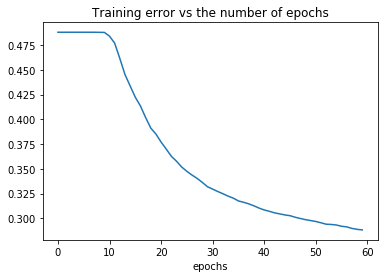

In [18]:
plt.plot(err_train[0:count])
plt.title('Training error vs the number of epochs')
plt.xlabel('epochs')
plt.show()


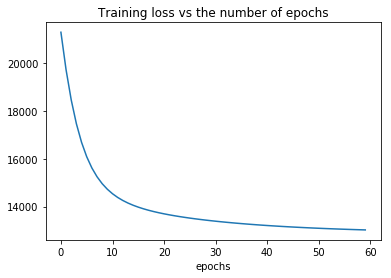

In [19]:
plt.plot(loss_train[0:count])
plt.title('Training loss vs the number of epochs')
plt.xlabel('epochs')
plt.show()


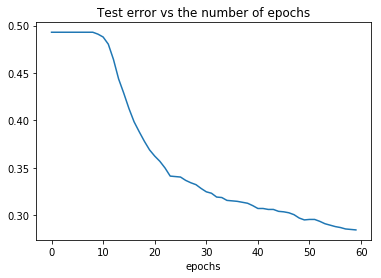

In [20]:
plt.plot(err_test[0:count])
plt.title('Test error vs the number of epochs')
plt.xlabel('epochs')
plt.show()


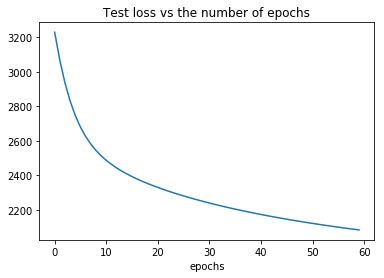

In [21]:
plt.plot(loss_test[0:count])
plt.title('Test loss vs the number of epochs')
plt.xlabel('epochs')
plt.show()
